# Task 1 - Exploratory Data Analysis


## Section 1 - Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

---

## Section 2 - Data loading


In [2]:
os.chdir('..')

In [3]:
df = pd.read_csv('Data/sample_sales_data.csv')
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [5]:
df.describe(include='all')

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
count,7829,7829,7829,7829,7829,7829.000000,7829.000000,7829.000000,7829
unique,7829,7738,300,22,5,NaN,NaN,NaN,4
top,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 19:32:20,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,fruit,non-member,NaN,NaN,NaN,cash
freq,1,2,114,998,1601,NaN,NaN,NaN,2027
mean,NaN,NaN,NaN,NaN,NaN,7.819480,2.501597,19.709905,NaN
std,NaN,NaN,NaN,NaN,NaN,5.388088,1.122722,17.446680,NaN
min,NaN,NaN,NaN,NaN,NaN,0.190000,1.000000,0.190000,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.990000,1.000000,6.570000,NaN
50%,NaN,NaN,NaN,NaN,NaN,7.190000,3.000000,14.970000,NaN
75%,NaN,NaN,NaN,NaN,NaN,11.190000,4.000000,28.470000,NaN


In [6]:
df.duplicated().sum()

0

---

## Section 4 - Visualisation

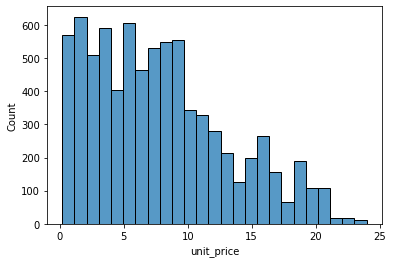

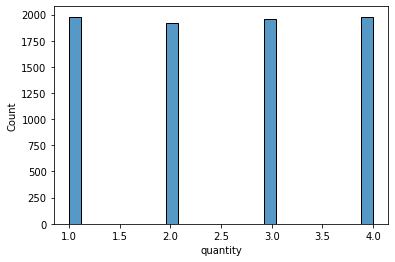

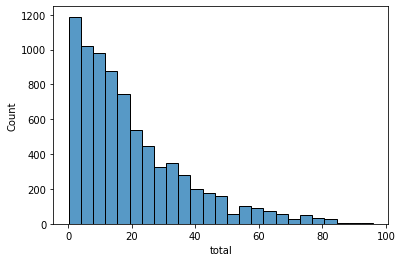

In [7]:
for col in [col for col in df.columns if df[col].dtype != 'object']:
  sns.histplot(x=col, data=df, bins=25)
  plt.show()

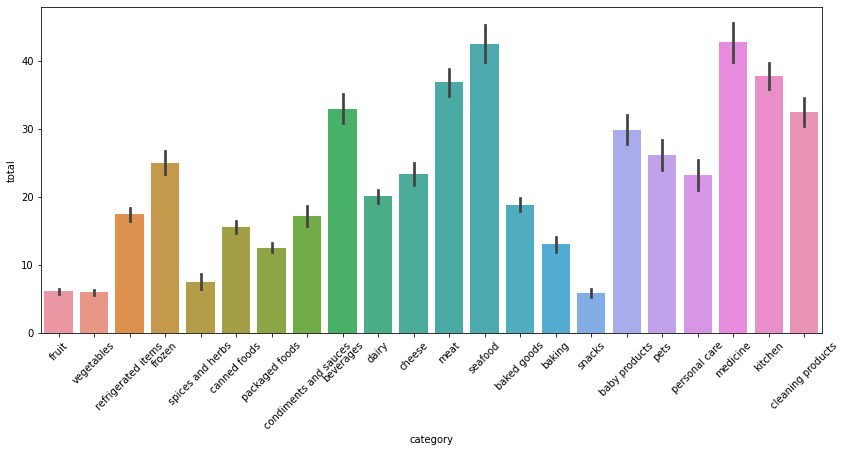

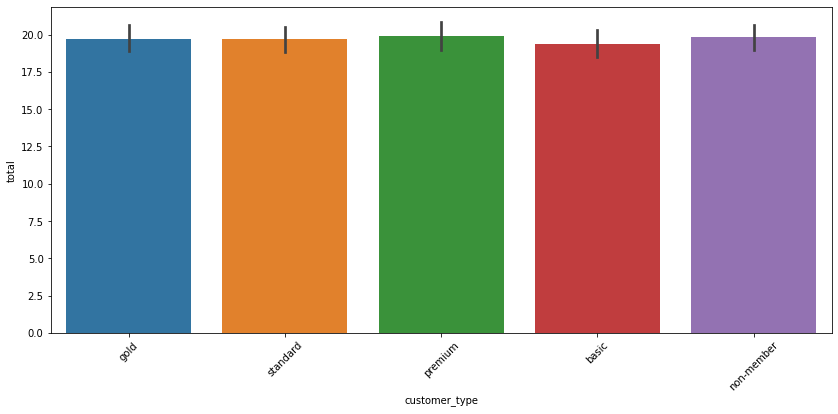

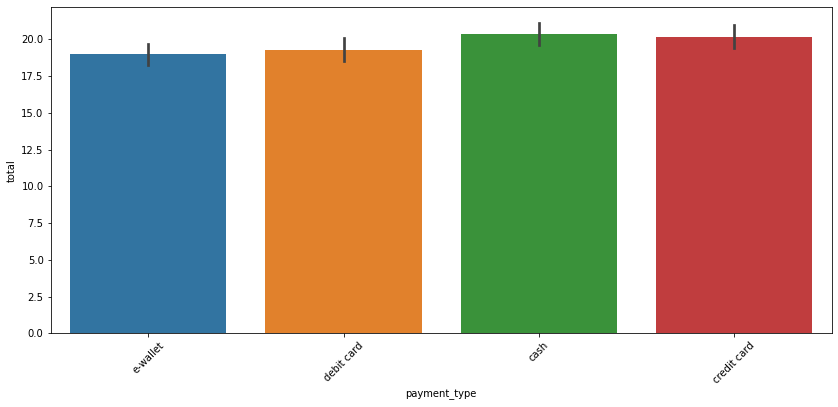

In [8]:
for col in [col for col in df.columns[3:] if df[col].dtype == 'object']:
  plt.figure(figsize=(14,6))
  plt.xticks(rotation=45)
  sns.barplot(x=col, y='total', data=df)
  plt.show()

In [9]:
df.category.value_counts(ascending=False)

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

In [10]:
df.payment_type.value_counts(ascending=False)

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64

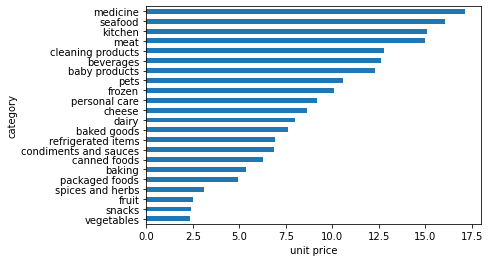

In [11]:
df.groupby('category')['unit_price'].mean().sort_values().plot(kind='barh')
plt.xlabel('unit price')
plt.show()

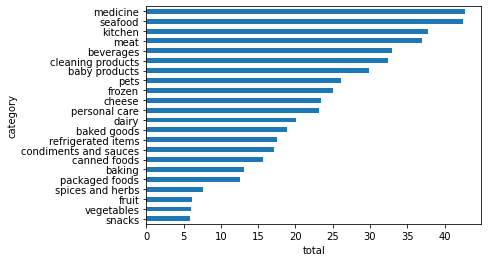

In [12]:
df.groupby('category')['total'].mean().sort_values().plot(kind='barh')
plt.xlabel('total')
plt.show()

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for



Insights:
- Medicine and seafood are top in sales
- Fruits and vegetables are the most frequently bought categories
- Category column contains variety which makes it a good candidate for modelling